<center> <h2>The University of British Columbia</h2> </center>
<center> <h2>Earth and Ocean Sciences 354</h2> </center>
<center> <h3>Geophysical Time Series Analysis</h3> </center>
<center> <h3>Problem Set # 8</h3> </center>

*Due: November 9, 2020*

#### Learning Goals:
* Know when and how to use low-pass, high-pass, and bandpass filters
* Differentiate between zero phase and minimum phase filters
* Calculate cross correlation and autocorrelation
---

1. Calculate the cross correlation of the sequences $(1,2,3)$ and $(1,-2,1)$, their autocorrelations, and their correlation coefficients. (Problem 4.6 on page 78 of TSAITG). Please do by hand. You can check your answers in Python, but this is not required. 

2. Computer exercise on Butterworth filters using Python. We will be using filters from the `scipy` library. Import this library using `import scipy.signal as sp`. The filter functions we will be using are `sp.lfilter`, `sp.filtfilt`, and `sp.butter`.

<html>
<p style="margin-left:25px">
The basic structure for using any of the filters will be:
</p>
</html> 

```python
btype = 'low'
b, a = sp.butter(N, fc/fn, btype)
filteredSpikeSeries = sp.lfilter(b, a, spikeSeries)
```
<html>
<p style="margin-left:25px">
<code>fc</code> is the cutoff frequency <code>fn</code> is the Nyquist frequency. For a bandpass filter, this input will be an array. For a minimum-phase filter, use <code>sp.lfilter</code> and for a zero-phase filter, use <code>sp.filtfilt</code>. <code>btype</code> is either <code>'low'</code>, <code>'high'</code>, or <code>'bandpass'</code> depending on the filter. A lowpass filter uses <code>sp.lfilter</code>, while both highpass and bandpass use <code>sp.filtfilt</code>.
</p>
</html> 

<html>
<ol start="1", style = "list-style-type:lower-alpha;">
    <li>A convolution of any sequence with a delta function returns the original sequence. To see the filter’s <i>impulse response</i> in the time domain, simply filter a spike, then take the FFT to see its amplitude and phase spectra. Generate a spike series using the <code>np.zeros</code> function with a spike at point 512 in a 1024 point long sequence. Choose a sample interval (${\Delta}t$) of 1 s and a minimum phase lowpass filter with corner frequency at 0.05 Hz. The following code shows how to filter the spike series with a lowpass filter. Examine the filter for different orders (or poles, $N=1,2,4,8$). Compare the onset of the filters. What do you notice? (Include time domain plots of the starting spike series, and the subsequent filtered spikes for the 4 poles specified. Zoom into the region of the plot where there is something interesting happening (i.e. somewhere between 510 and 700 seconds. To save space, try overplotting the 4 different curves on the same figure using a different colour for each curve. Be sure to make your COMMENTS). 
</li>
</ol>
</html>



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
import csv


N = 1024
t = np.linspace(0, N, N)
spikeSeries = N*[0]
spikeSeries[511] = 1

dt = 1
fs = 1/dt
fc = 0.05
wn = fc/(fs/2)

# QUESTION 2 A
#varying n
varyNPlots = []
varyNTransformPlots = []

varyNPlots.append(spikeSeries)

for n in [1, 2, 4, 8]:
    btype = 'low'
    b, a = sp.butter(n, wn, btype)
    lfiltSpikeSeries = sp.lfilter(b, a, spikeSeries)
    varyNPlots.append(lfiltSpikeSeries)
    varyNTransformPlots.append(np.fft.fft(lfiltSpikeSeries))

for p in varyNPlots:
    plt.plot(t, p)
plt.xlim(510, 625)
plt.xlabel("Time (s)")
plt.legend(['original series','N=1','N=2','N=4','N=8'])
plt.title("Minimum Phase Filter with Varying N")
plt.tight_layout()
plt.show()

<html>
<ol start="2", style = "list-style-type:lower-alpha;">
    <li>Take their FFT and comment on how the steepness of the amplitude spectrum varies with the number of poles. (Include an amplitude spectrum plot for each of the above 4 specified poles. Make sure you plot versus frequency, and make sure you plot between $−{\nu}_N$ to ${\nu}_N$ , i.e. “fftshifted” Fourier spectra. Consider again plotting different coloured curves over top of each other.) </li>
</ol>
</html>

In [ ]:
# QUESTION 2 B
fn = np.fft.fftfreq(N)
for p in varyNTransformPlots:
    plt.plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(p)))
plt.xlabel("Frequency (Hz)")
plt.legend(['N=1','N=2','N=4','N=8'])
plt.title("Minimum Phase Filter with Varying N")
plt.tight_layout()
plt.show()

<html>
<ol start="3", style = "list-style-type:lower-alpha;">
    <li>For the same starting spike, now vary the cut-off frequency FC (pick 7 values, 3 above and 3 below 0.05, and 0.05) and comment on the difference in both time and frequency domains for the filter with poles $N=8$. (Include plots of each filtered time series and its respective amplitude spectrum. Follow the frequency domain plotting guidelines mentioned previously. Overplot different coloured curves to save space. Be sure to write your COMMENTS on how the time and frequency domains vary with different cut off frequencies).</li>
</ol>
</html>

In [ ]:
#QUESTION 2 C
n = 8

#varying n
varyFCPlots = []
varyFCTransformPlots = []

for fc in [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]:
    btype = 'low'
    b, a = sp.butter(n, (fc/(fs/2)), btype)
    lfiltSpikeSeries = sp.lfilter(b, a, spikeSeries)
    varyFCPlots.append(lfiltSpikeSeries)
    varyFCTransformPlots.append(np.fft.fft(lfiltSpikeSeries))

for p in varyFCPlots:
    plt.plot(t, p)
plt.xlim(510, 700)
plt.xlabel("Time (s)")
plt.legend(['fc=0.02','fc=0.03','fc=0.04','fc=0.05','fc=0.06','fc=0.07','fc=0.08'])
plt.title("Minimum Phase Filter with Varying fc")
plt.tight_layout()
plt.show()

for p in varyFCTransformPlots:
    plt.plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(p)))
plt.xlabel("Frequency (Hz)")
plt.legend(['fc=0.02','fc=0.03','fc=0.04','fc=0.05','fc=0.06','fc=0.07','fc=0.08'])
plt.title("Minimum Phase Filter with Varying fc")
plt.xlim(-0.2, 0.2)
plt.tight_layout()
plt.show()

<html>
<ol start="4", style = "list-style-type:lower-alpha;">
    <li>Now specify a zero-phase filter and compare the results in both the time and frequency domains (amplitude spectrum) with those for a minimum phase filter using orders $N=4,8$ and a cutoff frequency FC of 0.05 Hz as before. (Include a time and frequency domain plot for each pole for each filter type. Here you could use colours to specify poles, and a linestyle to indicate minimum versus zero phase. Overplot the curves. Again, follow plotting guidelines above. Be sure to COMMENT; compare the results in time and frequency domain for the variying orders and filter types.)</li>
</ol>
</html>

In [ ]:
# QUESTION 2 D
minPlots = []
zeroPlots = []
minTransformPlots = []
zeroTransformPlots = []

for n in [4, 8]:
    btype = 'low'
    b, a = sp.butter(n, wn, btype)
    minPhaseSpikeSeries = sp.lfilter(b, a, spikeSeries)
    zeroPhaseSpikeSeries = sp.filtfilt(b, a, spikeSeries)
    minPlots.append(minPhaseSpikeSeries)
    minTransformPlots.append(np.fft.fft(minPhaseSpikeSeries))
    zeroPlots.append(zeroPhaseSpikeSeries)
    zeroTransformPlots.append(np.fft.fft(zeroPhaseSpikeSeries))


plt.plot(t, minPlots[0], 'r', alpha = 0.5)
plt.plot(t, zeroPlots[0], 'b', alpha = 0.5)
plt.plot(t, minPlots[1], 'r--', alpha = 0.5)
plt.plot(t, zeroPlots[1], 'b--', alpha = 0.5)
plt.xlabel("Time (s)")
plt.legend(['N=4, min phase','N=4, zero phase','N=8, min phase','N=8, zero phase'])
plt.title("Minimum vs Zero Phase Filter")
plt.xlim(400, 650)
plt.tight_layout()
plt.show()

plt.plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(minTransformPlots[0])), 'r', alpha = 0.5)
plt.plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(zeroTransformPlots[0])), 'b', alpha = 0.5)
plt.plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(minTransformPlots[1])), 'r--', alpha = 0.5)
plt.plot(np.fft.fftshift(fn), np.fft.fftshift(np.abs(zeroTransformPlots[1])), 'b--', alpha = 0.5)
plt.xlabel("Frequency (Hz)")
plt.legend(['N=4, min phase', 'N=4, zero phase', 'N=8, min phase', 'N=8, zero phase'])
plt.title("Minimum vs Zero Phase Filter")
plt.xlim(-0.25, 0.25)
plt.tight_layout()
plt.show()

<html>
<ol start="5", style = "list-style-type:lower-alpha;">
    <li>Now read in the data in the data file <code>nov1.csv</code> which represents a broadband seismogram recorded in New Zealand. The sampling frequency is 50 Hz. Plot the data and identify the $P$, $S$, and surface waves arrivals by indicating on your plot.</li>
</ol>
</html> 

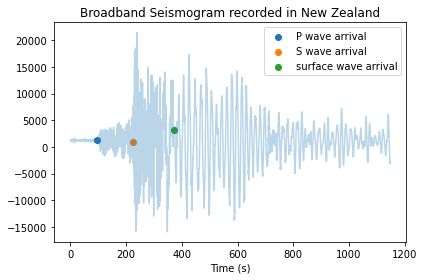

In [6]:
# QUESTION 2 E
import csv
import numpy as np
import matplotlib.pyplot as plt

novData = []

with open('nov1.csv', newline='') as File:
    reader = csv.reader(File)
    for row in reader:
        novData = np.append(novData, [float(row[0])])

N = len(novData)
fs = 50
dt = 1/fs
t = np.linspace(0, dt*N, N)

plt.plot(t, novData, alpha=0.3)
plt.scatter(t[4800], novData[4800], label='P wave arrival')
plt.scatter(t[11188], novData[11188], label='S wave arrival')
plt.scatter(t[18600], novData[18600], label='surface wave arrival')
plt.xlabel("Time (s)")
plt.title("Broadband Seismogram recorded in New Zealand")
plt.legend()
plt.tight_layout()
plt.show()

<html>
<ol start="6", style = "list-style-type:lower-alpha;">
    <li>Highpass filter the data with the minimum-phase butterworth filter with order $N = 2$ and cutoff frequency 2.0 Hz. Plot the filtered data. Note there is a “discontinuity” in the data at around $t = 370$s which is rich in high frequencies that gets accentuated by the highpass filter (ignore this, but indicate it on your plot). Can you see the aftershock? Indicate on your plot where you think the aftershock arrives. </li>
</ol>
</html> 

In [ ]:
# QUESTION 2 F
n = 2
fc = 2
wn = fc/(fs/2)
btype = 'high'
b, a = sp.butter(n, wn, btype)

hfiltNovData = sp.filtfilt(b, a, novData)

plt.plot(t, hfiltNovData, alpha=0.3)
plt.scatter(t[18430], hfiltNovData[18430], label='\"discontinuity\"')
plt.scatter(t[28895], hfiltNovData[28895], label='aftershock arrival')
plt.title("Highpass Filtered Seismogram")
plt.xlabel("Time (s)")
plt.legend()
plt.tight_layout()
plt.show()

<html>
<ol start="7", style = "list-style-type:lower-alpha;">
    <li>If this is indeed an aftershock it will have the same $S − P$ time as the main shock. Measure the $S −P$ times by using the code from Lab #7 to find data points from a graph, and zoom in to improve your accuracy. If the average <i>P</i>-wave velocity is 8 km/s and the <i>S</i>-wave velocity is 4.6 km/s, estimate the distance to the earthquakes. Show the work you did to figure out the distance.</li>
</ol>
</html>

In [ ]:
# QUESTION 2 G
plt.plot(t, hfiltNovData, alpha = 0.3)
plt.scatter(t[4800], hfiltNovData[4800], label='P arrival')
plt.scatter(t[11255], hfiltNovData[11255], label='S arrival')
plt.scatter(t[28895], hfiltNovData[28895], label='aftershock P arrival')
plt.scatter(t[35388], hfiltNovData[35388], label='aftershock S arrival')
plt.xlabel("Time (s)")
plt.title("Highpass Filtered Nov Data with P and S Arrivals Indicated")
plt.legend()
plt.tight_layout()
plt.show()

deltaT1 = t[11255]-t[4800]
deltaT2 = t[35388]-t[28895]

<html>
<ol start="8", style = "list-style-type:lower-alpha;">
    <li>Now let’s examine the first (<i>P</i>-wave) on the original broadband trace by zooming in with the magnification tool. Filter the trace with the bandpass filter at between cut-off frequencies of 0.8 and 1.5 Hz and an order $N = 2$. What is your estimate of the onset time of the <i>P</i>-wave? Plot the filtered and zoomed in trace.</li>
</ol>
</html>

In [ ]:
# QUESTION 2 H
n = 2
fc = [0.8, 1.5]
wn = [(fc[0]/(fs/2)), (fc[1]/(fs/2))]
btype = 'bandpass'
b, a = sp.butter(n, wn, btype)

bpfiltNovData = sp.filtfilt(b, a, novData)

plt.plot(t, bpfiltNovData, alpha = 0.3)
plt.scatter(t[5303], bpfiltNovData[5303], s=10, c='magenta', label='P arrival')
plt.xlim(75, 150)
plt.ylim(-1000, 1000)
plt.xlabel("Time (s)")
plt.title("Bandpass Filtered Seismogram")
plt.legend()
plt.tight_layout()
plt.show()

<html>
<ol start="9", style = "list-style-type:lower-alpha;">
    <li>Now highpass filter the original broadband data using a cutoff frequency of 2.0 Hz and estimate the onset time now. Again, provide your zoomed in plot that you estimated the arrival time from. You should find a big difference of around 10 s. This is an example of dispersion caused by a wave travelling through a thin, fast layer (in this case the subducted Pacific crust). The 1 Hz arrival (seen on the bandpass trace) travels at more or less normal velocity. Think about whether you should have used zero phase or minimum phase filters for any interpretation (i.e., provide your comments on whether you feel you should have used zero or minimum phase filters). </li>
</ol>
</html>  

<html>
<p style="margin-left:25px">
For all plots or groups of plots, please label the <code>x-axis</code> to indicate frequency or time (and include the units). Make sure that your plots are titled so that each figure can be easily distinguished. Visit the <a href="https://matplotlib.org/stable/api/pyplot_summary.html">matplotlib API</a> to find more information about <code>plt.title</code>, <code>plt.xlabel</code> and other useful functions. Please group the different plots as outlined above to save space. Make sure that you zoom into the interesting areas for your time domain plots. It is not important to show the full 1024 second time series, but just the important or relevant parts to the particular question. Use the <code>plt.xlim(min, max)</code> command to focus the interesting range.
</p>
</html>

In [ ]:
# QUESTION 2 I
n = 2
fc = 2
wn = fc/(fs/2)
btype = 'high'
b, a = sp.butter(n, wn, btype)

hfiltNovData = sp.filtfilt(b, a, novData)

plt.plot(t, hfiltNovData, alpha = 0.3)
plt.scatter(t[4842], hfiltNovData[4842], s=10, c='magenta', label='P arrival')
plt.xlim(80, 120)
plt.ylim(-1000, 1000)
plt.xlabel("Time (s)")
plt.title("Highpass Filtered Seismogram")
plt.legend()
plt.tight_layout()
plt.show()

# zero and minimum phase filtered data for explanation
n = 2
fc = 2
wn = fc/(fs/2)
btype = 'low'
b, a = sp.butter(n, wn, btype)

hfiltNovData = sp.filtfilt(b, a, novData)

plt.plot(t, hfiltNovData, alpha = 0.3)
plt.xlabel("Time (s)")
plt.title("Zero Phase Filtered Seismogram")
plt.xlim(40, 250)
plt.ylim(-3000, 5000)
plt.tight_layout()
plt.show()

n = 2
fc = 2
wn = fc/(fs/2)
btype = 'low'
b, a = sp.butter(n, wn, btype)

hfiltNovData = sp.lfilter(b, a, novData)

plt.plot(t, hfiltNovData, alpha = 0.3)
plt.xlabel("Time (s)")
plt.title("Minimum Phase Filtered Seismogram")
plt.xlim(50, 250)
plt.ylim(-3000, 5000)
plt.tight_layout()
plt.show()